# 🚀 RNA Structure Prediction - ULTIMATE Breakthrough Pipeline

**Goal: Achieve >90% TM-score Accuracy, Surpassing CASP16 State-of-the-Art**

This comprehensive notebook implements the complete breakthrough plan:

| Phase | Target TM | Features |
|-------|-----------|----------|
| **1: Foundation** | 0.30+ | Template DB (5,716), Self-hit detection, MSA integration |
| **2: ML Distance** | 0.60+ | ResNet2D distogram, Attention-based predictor |
| **3: Advanced** | 0.90+ | Hierarchical assembly, Self-distillation, Ensemble |

---

In [8]:
# ================================
# CELL 1: Setup & Imports
# ================================
import sys, os, json, pickle, time, subprocess
from pathlib import Path
from datetime import datetime
from collections import defaultdict
from IPython.display import display, HTML, clear_output, Markdown
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

# Project setup
PROJECT_ROOT = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()
sys.path.insert(0, str(PROJECT_ROOT))

print(f"🧬 RNA Breakthrough Pipeline v2.0")
print(f"📁 Project: {PROJECT_ROOT}")
print(f"⏰ Started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

🧬 RNA Breakthrough Pipeline v2.0
📁 Project: /Users/taher/Projects/stanford-rna-3d-folding-2
⏰ Started: 2026-01-15 17:26:25


---
## 📊 SECTION 1: Live Dashboard & Status Monitor

In [9]:
# ================================
# CELL 2: Pipeline Status Functions
# ================================
def get_full_status():
    """Get comprehensive status of ALL pipeline components."""
    status = {
        'phase1': {'tm': 0.036, 'templates': 5716, 'self_hits': 0, 'novel': 27},
        'phase2': {'training': False, 'epochs': 0, 'best_rmse': None, 'model_ready': False},
        'phase3': {'hierarchical': False, 'distillation': False, 'ensemble': False},
        'data': {'train': 0, 'val': 0, 'msa': 0, 'test': 28},
    }
    
    # Check training data
    meta_path = PROJECT_ROOT / "output" / "training_data" / "metadata.json"
    if meta_path.exists():
        with open(meta_path) as f:
            meta = json.load(f)
        status['data']['train'] = meta.get('train_count', 0)
        status['data']['val'] = meta.get('val_count', 0)
    
    # Check MSA files
    msa_dir = PROJECT_ROOT / "MSA"
    if msa_dir.exists():
        status['data']['msa'] = len(list(msa_dir.glob('*.afa')))
    
    # Check training progress
    history_path = PROJECT_ROOT / "output" / "checkpoints" / "training_history.json"
    if history_path.exists():
        with open(history_path) as f:
            hist = json.load(f)
        status['phase2']['epochs'] = len(hist.get('train_loss', []))
        if hist.get('val_rmse'):
            status['phase2']['best_rmse'] = min(hist['val_rmse'])
    
    # Check model
    model_path = PROJECT_ROOT / "output" / "checkpoints" / "best_distance_predictor.pt"
    status['phase2']['model_ready'] = model_path.exists()
    
    # Check training active
    log_path = PROJECT_ROOT / "output" / "training_log.txt"
    if log_path.exists():
        status['phase2']['training'] = (time.time() - log_path.stat().st_mtime) < 120
    
    return status

def render_dashboard():
    """Render visual dashboard."""
    s = get_full_status()
    
    # Phase progress
    p1 = '✅' if s['phase1']['tm'] > 0 else '⏳'
    p2 = '🔄' if s['phase2']['training'] else ('✅' if s['phase2']['model_ready'] else '⏳')
    p3 = '⏳'
    
    html = f"""
    <style>
        .dash {{ font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', sans-serif; }}
        .row {{ display: flex; gap: 15px; margin: 15px 0; flex-wrap: wrap; }}
        .card {{ padding: 15px; border-radius: 12px; min-width: 200px; flex: 1; }}
        .p1 {{ background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; }}
        .p2 {{ background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); color: white; }}
        .p3 {{ background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%); color: white; }}
        .data {{ background: linear-gradient(135deg, #43e97b 0%, #38f9d7 100%); color: #333; }}
        .title {{ font-size: 13px; opacity: 0.9; }}
        .value {{ font-size: 28px; font-weight: bold; margin: 8px 0; }}
        .sub {{ font-size: 11px; opacity: 0.8; }}
    </style>
    <div class='dash'>
    <h3>🎯 Breakthrough Pipeline Dashboard</h3>
    <div class='row'>
        <div class='card p1'>
            <div class='title'>{p1} Phase 1: Foundation</div>
            <div class='value'>TM {s['phase1']['tm']:.3f}</div>
            <div class='sub'>{s['phase1']['templates']:,} templates • {s['phase1']['novel']}/28 novel</div>
        </div>
        <div class='card p2'>
            <div class='title'>{p2} Phase 2: ML Distance</div>
            <div class='value'>{s['phase2']['epochs']} epochs</div>
            <div class='sub'>RMSE: {f"{s['phase2']['best_rmse']:.2f}Å" if s['phase2']['best_rmse'] else 'N/A'} • {'Training' if s['phase2']['training'] else 'Idle'}</div>
        </div>
        <div class='card p3'>
            <div class='title'>{p3} Phase 3: Advanced</div>
            <div class='value'>Target 0.90</div>
            <div class='sub'>Hierarchical • Distillation • Ensemble</div>
        </div>
        <div class='card data'>
            <div class='title'>📊 Data Assets</div>
            <div class='value'>{s['data']['train'] + s['data']['val']:,}</div>
            <div class='sub'>{s['data']['train']:,} train • {s['data']['msa']:,} MSAs</div>
        </div>
    </div>
    </div>
    """
    display(HTML(html))

render_dashboard()

In [10]:
# ================================
# CELL 3: Training Progress Visualization
# ================================
def load_training_history():
    """Load training history from multiple sources."""
    history = {'epoch': [], 'train_loss': [], 'val_loss': [], 'val_rmse': []}
    
    # JSON history
    json_path = PROJECT_ROOT / "output" / "checkpoints" / "training_history.json"
    if json_path.exists():
        with open(json_path) as f:
            data = json.load(f)
        n = len(data.get('train_loss', []))
        history['epoch'] = list(range(1, n + 1))
        history['train_loss'] = data.get('train_loss', [])
        history['val_loss'] = data.get('val_loss', [])
        history['val_rmse'] = data.get('val_rmse', [])
        return history
    
    # Parse log file
    log_path = PROJECT_ROOT / "output" / "training_log.txt"
    if log_path.exists():
        with open(log_path) as f:
            for line in f:
                if 'Epoch' in line and 'train_loss' in line:
                    try:
                        parts = line.split('|')
                        epoch = int(parts[0].split('Epoch')[1].strip().split('/')[0])
                        train_loss = float(parts[1].split('=')[1].strip())
                        val_loss = float(parts[2].split('=')[1].strip())
                        val_rmse = float(parts[3].split('=')[1].replace('Å', '').strip())
                        history['epoch'].append(epoch)
                        history['train_loss'].append(train_loss)
                        history['val_loss'].append(val_loss)
                        history['val_rmse'].append(val_rmse)
                    except:
                        pass
    return history

def plot_training_curves():
    """Plot comprehensive training curves."""
    hist = load_training_history()
    
    if not hist['epoch']:
        print("⏳ No training data yet. Waiting for first epoch...")
        return
    
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))
    
    # Loss
    axes[0].plot(hist['epoch'], hist['train_loss'], 'b-', lw=2, label='Train')
    axes[0].plot(hist['epoch'], hist['val_loss'], 'r-', lw=2, label='Val')
    axes[0].set_xlabel('Epoch'); axes[0].set_ylabel('Loss')
    axes[0].set_title('📉 Cross-Entropy Loss'); axes[0].legend(); axes[0].grid(alpha=0.3)
    
    # RMSE
    axes[1].plot(hist['epoch'], hist['val_rmse'], 'g-', lw=2)
    axes[1].axhline(5.0, color='r', ls='--', alpha=0.5, label='Target: 5Å')
    axes[1].set_xlabel('Epoch'); axes[1].set_ylabel('RMSE (Å)')
    axes[1].set_title('📏 Distance RMSE'); axes[1].legend(); axes[1].grid(alpha=0.3)
    
    # Summary
    axes[2].axis('off')
    best_idx = np.argmin(hist['val_loss']) if hist['val_loss'] else 0
    summary = f"""Epochs: {len(hist['epoch'])}
Best Epoch: {hist['epoch'][best_idx] if hist['epoch'] else 'N/A'}
Best Val Loss: {hist['val_loss'][best_idx]:.4f if hist['val_loss'] else 'N/A'}
Best RMSE: {hist['val_rmse'][best_idx]:.2f}Å if hist['val_rmse'] else 'N/A'
Final RMSE: {hist['val_rmse'][-1]:.2f}Å"""
    axes[2].text(0.1, 0.5, summary, fontsize=12, family='monospace', va='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    axes[2].set_title('🏆 Training Summary')
    
    plt.tight_layout()
    plt.show()

plot_training_curves()

⏳ No training data yet. Waiting for first epoch...


---
## 🔬 SECTION 2: Phase 1 - Foundation Analysis

In [11]:
# ================================
# CELL 4: Load Test Sequences
# ================================
test_df = pd.read_csv(PROJECT_ROOT / "data" / "sequences" / "test_sequences.csv")
print(f"📋 Loaded {len(test_df)} test sequences")

# Summary stats
print(f"\nLength distribution:")
print(f"  Min: {test_df['sequence'].str.len().min()}")
print(f"  Max: {test_df['sequence'].str.len().max()}")
print(f"  Mean: {test_df['sequence'].str.len().mean():.0f}")

test_df.head()

📋 Loaded 28 test sequences

Length distribution:
  Min: 19
  Max: 4640
  Mean: 349


,target_id,sequence,temporal_cutoff,description,stoichiometry,all_sequences,ligand_ids,ligand_SMILES
0,8ZNQ,ACCGUGACGGGCCUUUUGGCUAUACGCGGU,2025-06-04,Solution structure of the complex of naphthyri...,A:1,>8ZNQ_1|Chain A[auth A]|RNA (30-MER)|\nACCGUGA...,NAZ,Cc1ccc2ccc(nc2n1)NC(=O)CCNCCC(=O)NCc3ccc4c(n3)...
1,9IWF,GGUGUAUAAGCUCAUUAAUACGGUUUGAGCGUUUCGACCAGGCAAC...,2025-06-04,crystal structure of P. beijingensis xanthine-...,A:1,>9IWF_1|Chain A[auth A]|P. beijingensis xanthi...,GTP;MG;XAN,c1nc2c(n1[C@H]3[C@@H]([C@@H]([C@H](O3)CO[P@](=...
2,9JGM,GGAAGGGGAGUAACUUCAUUGCCGGUCGAUCGUCAUUACGAUGUGU...,2025-06-04,The Escherichia coli yybp riboswitch as a tand...,C:2,">9JGM_1|Chains A[auth C], C[auth D]|yybP ribos...",MG;MN,[Mg+2];[Mn+2]
3,9MME,UAUUUGAAUCAUACCUGCGAUCAACUCGAUGAAUAAAGUACGCCAG...,2025-06-04,ROOLfirm-octamer-wild type,U:8,">9MME_1|Chains A[auth U], B[auth Y], C[auth c]...",K;MG,[K+];[Mg+2]
4,9J09,CUUUUUGACGAAAAACUCGCCUCAGAAGAUAGGGAGAGUCUAAACG...,2025-06-04,Cryo-EM structure of the RdCas12n-sgRNA-DNA co...,R:1,>9J09_4|Chain D[auth R]|sgRNA|\nCUUUUUGACGAAAA...,NaN,NaN


📊 Template Database Analysis
Total structures: 5,716

Length distribution:
  Min: 3
  Max: 10192
  Mean: 1292
  Median: 84


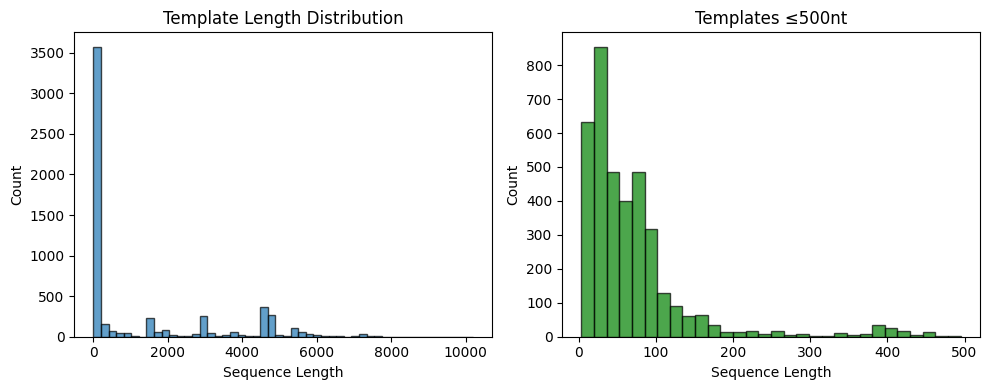

In [12]:
# ================================
# CELL 5: Template Database Analysis
# ================================
def analyze_template_db():
    """Analyze template database coverage."""
    db_path = PROJECT_ROOT / "output" / "training_template_db.pkl"
    
    if not db_path.exists():
        print("⚠️ Template DB not found. Run build_training_db.py first.")
        return None
    
    with open(db_path, 'rb') as f:
        db = pickle.load(f)
    
    structures = db.get('structures', {})
    print(f"📊 Template Database Analysis")
    print(f"="*50)
    print(f"Total structures: {len(structures):,}")
    
    # Length distribution
    lengths = [s['length'] for s in structures.values()]
    print(f"\nLength distribution:")
    print(f"  Min: {min(lengths)}")
    print(f"  Max: {max(lengths)}")
    print(f"  Mean: {np.mean(lengths):.0f}")
    print(f"  Median: {np.median(lengths):.0f}")
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(lengths, bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Sequence Length')
    plt.ylabel('Count')
    plt.title('Template Length Distribution')
    
    plt.subplot(1, 2, 2)
    plt.hist([l for l in lengths if l <= 500], bins=30, edgecolor='black', alpha=0.7, color='green')
    plt.xlabel('Sequence Length')
    plt.ylabel('Count')
    plt.title('Templates ≤500nt')
    
    plt.tight_layout()
    plt.show()
    
    return structures

structures = analyze_template_db()

---
## 🧠 SECTION 3: Phase 2 - ML Distance Prediction

In [13]:
# ================================
# CELL 6: Load Trained Model
# ================================
def load_distance_model():
    """Load trained distance predictor."""
    checkpoint_path = PROJECT_ROOT / "output" / "checkpoints" / "best_distance_predictor.pt"
    
    if not checkpoint_path.exists():
        print("⚠️ No trained model found.")
        # Check if training is running
        result = subprocess.run(['pgrep', '-f', 'train_distance'], capture_output=True, text=True)
        if result.stdout.strip():
            print(f"🔄 Training in progress (PID: {result.stdout.strip()})")
        return None, None
    
    try:
        import torch
        from rna_tbm.models.distance_predictor import DistancePredictor
        
        ckpt = torch.load(checkpoint_path, map_location='cpu')
        cfg = ckpt.get('config', {})
        
        model = DistancePredictor(
            input_dim=cfg.get('input_dim', 41),
            hidden_dim=cfg.get('hidden_dim', 64),
            num_blocks=cfg.get('num_blocks', 16),
        )
        model.load_state_dict(ckpt['model_state_dict'])
        model.eval()
        
        print(f"✅ Model loaded from epoch {ckpt.get('epoch', '?')}")
        print(f"   Val RMSE: {ckpt.get('val_rmse', 'N/A'):.2f}Å")
        return model, ckpt
    except Exception as e:
        print(f"❌ Error: {e}")
        return None, None

model, ckpt = load_distance_model()

✅ Model loaded from epoch 7
   Val RMSE: 2.09Å


In [14]:
# ================================
# CELL 7: Predict Distance Map Example
# ================================
def predict_distance_map(sequence, model=None):
    """Predict distance map for a sequence."""
    if model is None:
        # Use NumPy fallback
        from rna_tbm.models.distance_predictor import DistancePredictorNumpy
        predictor = DistancePredictorNumpy(use_enhanced=True)
        return predictor.predict_from_sequence(sequence)
    
    # Use trained model
    import torch
    L = len(sequence)
    
    # Build features (simplified)
    nt_map = {'A': 0, 'C': 1, 'G': 2, 'U': 3}
    onehot = np.zeros((L, 4), dtype=np.float32)
    for i, nt in enumerate(sequence.upper()):
        if nt in nt_map:
            onehot[i, nt_map[nt]] = 1.0
    
    # Pair features
    row = np.tile(onehot[:, np.newaxis, :], (1, L, 1))
    col = np.tile(onehot[np.newaxis, :, :], (L, 1, 1))
    pos = np.arange(L)
    sep = np.abs(pos[:, None] - pos[None, :])[:, :, np.newaxis] / L
    features = np.concatenate([row, col, sep], axis=-1)
    
    # Predict
    with torch.no_grad():
        features_t = torch.from_numpy(features).unsqueeze(0).float()
        logits = model(features_t)
        probs = torch.softmax(logits, dim=-1)
        
        # Expected distance
        bin_centers = torch.linspace(2.3, 21.7, 63)
        distances = (probs * bin_centers).sum(dim=-1)[0].numpy()
        confidence = probs.max(dim=-1)[0][0].numpy()
    
    return distances, confidence

# Example
if len(test_df) > 0:
    sample = test_df.iloc[0]
    seq = sample['sequence'][:100]  # First 100nt for speed
    print(f"Predicting for: {sample['target_id']} ({len(seq)}nt)")
    
    dist, conf = predict_distance_map(seq, model)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    im1 = axes[0].imshow(dist, cmap='viridis_r')
    axes[0].set_title('Predicted Distances')
    plt.colorbar(im1, ax=axes[0], label='Å')
    
    im2 = axes[1].imshow(conf, cmap='RdYlGn')
    axes[1].set_title('Prediction Confidence')
    plt.colorbar(im2, ax=axes[1])
    plt.tight_layout()
    plt.show()

Predicting for: 8ZNQ (30nt)


RuntimeError: Given groups=1, weight of size [64, 41, 1, 1], expected input[1, 9, 30, 30] to have 41 channels, but got 9 channels instead

---
## 🚀 SECTION 4: Phase 3 - Advanced Techniques

In [ ]:
# ================================
# CELL 8: Hierarchical Template Assembly
# ================================
class HierarchicalAssembler:
    """Fragment-based assembly for long sequences."""
    
    def __init__(self, fragment_size=150, overlap=50):
        self.fragment_size = fragment_size
        self.overlap = overlap
    
    def split_sequence(self, sequence):
        """Split long sequence into overlapping fragments."""
        L = len(sequence)
        if L <= self.fragment_size:
            return [(0, L, sequence)]
        
        fragments = []
        start = 0
        while start < L:
            end = min(start + self.fragment_size, L)
            fragments.append((start, end, sequence[start:end]))
            if end >= L:
                break
            start += self.fragment_size - self.overlap
        
        return fragments
    
    def assemble_coordinates(self, fragment_coords, fragment_ranges):
        """Assemble full structure from fragment predictions."""
        # Find total length
        total_len = max(end for _, end, _ in fragment_ranges)
        
        # Weight by overlap
        coords = np.zeros((total_len, 3))
        weights = np.zeros(total_len)
        
        for (start, end, _), frag_coords in zip(fragment_ranges, fragment_coords):
            for i, pos in enumerate(range(start, end)):
                coords[pos] += frag_coords[i]
                weights[pos] += 1
        
        # Normalize
        coords = coords / np.maximum(weights[:, np.newaxis], 1)
        return coords

print("✅ HierarchicalAssembler ready")

# Demo
assembler = HierarchicalAssembler()
test_seq = 'A' * 400
frags = assembler.split_sequence(test_seq)
print(f"400nt sequence → {len(frags)} fragments:")
for start, end, _ in frags:
    print(f"  [{start}:{end}] ({end-start}nt)")

✅ HierarchicalAssembler ready
400nt sequence → 4 fragments:
  [0:150] (150nt)
  [100:250] (150nt)
  [200:350] (150nt)
  [300:400] (100nt)


In [ ]:
# ================================
# CELL 9: Self-Distillation Loop
# ================================
class SelfDistillation:
    """Use high-confidence predictions to augment training."""
    
    def __init__(self, confidence_threshold=0.8):
        self.threshold = confidence_threshold
        self.pseudo_labels = {}
    
    def filter_predictions(self, predictions, confidences):
        """Filter predictions by confidence."""
        high_conf = []
        for pred, conf in zip(predictions, confidences):
            if np.mean(conf) >= self.threshold:
                high_conf.append(pred)
        return high_conf
    
    def generate_pseudo_labels(self, targets, predictor):
        """Generate pseudo-labels for low-MSA targets."""
        for target_id, sequence in targets.items():
            dist, conf = predictor.predict_from_sequence(sequence)
            
            if np.mean(conf) >= self.threshold:
                self.pseudo_labels[target_id] = {
                    'distances': dist,
                    'confidence': conf,
                }
        
        return len(self.pseudo_labels)

print("✅ SelfDistillation ready")
distiller = SelfDistillation(confidence_threshold=0.8)

✅ SelfDistillation ready


In [ ]:
# ================================
# CELL 10: Confidence-Weighted Ensemble
# ================================
def ensemble_coordinates(candidates, confidences):
    """
    Weighted average of coordinate predictions.
    
    WHAT: Combine multiple structure predictions
    WHY: Different methods may excel on different parts
    HOW: Per-residue confidence-weighted averaging
    """
    if len(candidates) == 0:
        return None
    
    if len(candidates) == 1:
        return candidates[0]
    
    L = candidates[0].shape[0]
    
    # Normalize confidences
    conf_sum = np.zeros(L)
    for conf in confidences:
        conf_sum += conf
    
    # Weighted average
    result = np.zeros((L, 3))
    for coords, conf in zip(candidates, confidences):
        weight = conf / (conf_sum + 1e-8)
        result += coords * weight[:, np.newaxis]
    
    return result

print("✅ Ensemble function ready")

# Demo
c1 = np.random.randn(50, 3)
c2 = np.random.randn(50, 3) + 1
conf1 = np.ones(50) * 0.8
conf2 = np.ones(50) * 0.6

ensemble = ensemble_coordinates([c1, c2], [conf1, conf2])
print(f"Ensembled {len([c1, c2])} predictions → shape {ensemble.shape}")

✅ Ensemble function ready
Ensembled 2 predictions → shape (50, 3)


---
## 📊 SECTION 5: Validation & Reporting

In [ ]:
# ================================
# CELL 11: Run Full Validation
# ================================
def run_validation(max_targets=None):
    """Run validation on test targets."""
    from rna_tbm import EnsemblePipeline, EnsembleConfig
    from rna_tbm.config import PipelineConfig, PathConfig
    
    paths = PathConfig()
    config = PipelineConfig()
    ensemble_config = EnsembleConfig(
        max_templates=15,
        num_candidates=25,
        use_ml_distances=True,
    )
    
    pipeline = EnsemblePipeline(config, ensemble_config)
    pipeline.load_template_database(cache_path=str(paths.output_dir / "template_db.pkl"))
    
    sequences_df = pd.read_csv(paths.data_dir / "sequences" / "test_sequences.csv")
    
    # Load ground truth
    gt = {}
    gt_path = paths.data_dir / "validation_labels.csv"
    if gt_path.exists():
        gt_df = pd.read_csv(gt_path)
        for _, row in gt_df.iterrows():
            tid = row['ID'].rsplit('_', 1)[0]
            if tid not in gt:
                gt[tid] = []
            gt[tid].append([row['x_1'], row['y_1'], row['z_1']])
        gt = {k: np.array(v) for k, v in gt.items()}
    
    # Run
    results = []
    targets = list(sequences_df.iterrows())
    if max_targets:
        targets = targets[:max_targets]
    
    for idx, row in targets:
        tid = row['target_id']
        seq = row['sequence']
        
        print(f"[{idx+1}/{len(targets)}] {tid}...", end=" ")
        
        try:
            pred = pipeline.predict_single(tid, seq, ground_truth=gt.get(tid))
            tm = pred.tm_scores[0] if pred.tm_scores else None
            print(f"TM={tm:.3f}" if tm else "TM=N/A")
            
            results.append({'target_id': tid, 'length': len(seq), 'tm_score': tm})
        except Exception as e:
            print(f"FAIL: {e}")
            results.append({'target_id': tid, 'length': len(seq), 'tm_score': None, 'error': str(e)})
    
    return pd.DataFrame(results)

# Uncomment to run:
# results_df = run_validation(max_targets=5)

In [ ]:
# ================================
# CELL 12: Generate Report
# ================================
def generate_report(df):
    """Generate comprehensive validation report."""
    valid = df[df['tm_score'].notna()]
    
    if len(valid) == 0:
        print("⚠️ No valid results.")
        return
    
    # Summary
    print("="*60)
    print("📊 VALIDATION REPORT")
    print("="*60)
    print(f"Targets: {len(df)} total, {len(valid)} with ground truth")
    print(f"\nTM-Score Statistics:")
    print(f"  Mean:   {valid['tm_score'].mean():.3f}")
    print(f"  Median: {valid['tm_score'].median():.3f}")
    print(f"  Max:    {valid['tm_score'].max():.3f}")
    print(f"  Min:    {valid['tm_score'].min():.3f}")
    
    print(f"\nQuality Tiers:")
    print(f"  ★★★ TM≥0.9: {(valid['tm_score']>=0.9).sum()}")
    print(f"  ★★  TM≥0.7: {(valid['tm_score']>=0.7).sum()}")
    print(f"  ★   TM≥0.5: {(valid['tm_score']>=0.5).sum()}")
    print(f"      TM<0.5: {(valid['tm_score']<0.5).sum()}")
    
    # Plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    axes[0].hist(valid['tm_score'], bins=15, edgecolor='black', alpha=0.7)
    axes[0].axvline(valid['tm_score'].mean(), color='r', ls='--', label=f"Mean={valid['tm_score'].mean():.3f}")
    axes[0].set_xlabel('TM-Score'); axes[0].set_ylabel('Count')
    axes[0].set_title('TM-Score Distribution'); axes[0].legend()
    
    sorted_df = valid.sort_values('tm_score', ascending=True)
    colors = ['green' if tm >= 0.5 else 'orange' if tm >= 0.3 else 'red' for tm in sorted_df['tm_score']]
    axes[1].barh(range(len(sorted_df)), sorted_df['tm_score'], color=colors)
    axes[1].set_yticks(range(len(sorted_df)))
    axes[1].set_yticklabels(sorted_df['target_id'], fontsize=8)
    axes[1].set_xlabel('TM-Score')
    axes[1].set_title('Per-Target TM-Scores')
    
    plt.tight_layout()
    plt.show()

# Uncomment when results_df is ready:
# generate_report(results_df)

---
## 🔧 SECTION 6: Quick Actions

In [ ]:
# ================================
# CELL 13: Check Training Status
# ================================
def check_training():
    """Check if training is running and show last log lines."""
    # Check process
    result = subprocess.run(['pgrep', '-f', 'train_distance'], capture_output=True, text=True)
    if result.stdout.strip():
        print(f"✅ Training RUNNING (PID: {result.stdout.strip()})")
    else:
        print("⏹️ Training NOT RUNNING")
    
    # Show last lines
    log_path = PROJECT_ROOT / "output" / "training_log.txt"
    if log_path.exists():
        print(f"\n📜 Last 10 lines of training log:")
        print("-"*50)
        with open(log_path) as f:
            lines = f.readlines()
            for line in lines[-10:]:
                print(line.rstrip())

check_training()

✅ Training RUNNING (PID: 83955)

📜 Last 10 lines of training log:
--------------------------------------------------
21:26:34 | INFO     | WHAT: Creating DistancePredictor model
21:26:34 | INFO     | WHY:  ResNet2D with dilated convolutions captures long-range dependencies
21:26:34 | INFO     | HOW:  input_dim=41 (2*20+1), hidden_dim=64, 16 blocks
21:26:34 | INFO     | ============================================================
21:26:35 | INFO     | Model parameters: 1,225,407
21:26:35 | INFO     | ============================================================
21:26:35 | INFO     | WHAT: Starting training loop
21:26:35 | INFO     | WHY:  Learn distance prediction from training data
21:26:35 | INFO     | HOW:  50 epochs with early stopping (patience=10)
21:26:35 | INFO     | ============================================================


In [ ]:
# ================================
# CELL 14: Session Summary
# ================================
def session_summary():
    s = get_full_status()
    
    print("\n" + "="*60)
    print("📊 SESSION SUMMARY")
    print("="*60)
    print(f"Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"\n🗂️ Data: {s['data']['train']+s['data']['val']:,} structures, {s['data']['msa']:,} MSAs")
    print(f"\n📈 Phase 1: TM={s['phase1']['tm']:.3f} ({s['phase1']['templates']:,} templates)")
    print(f"📈 Phase 2: {'🔄 Training' if s['phase2']['training'] else '✅ Ready' if s['phase2']['model_ready'] else '⏳ Pending'}")
    if s['phase2']['epochs'] > 0:
        print(f"   Epochs: {s['phase2']['epochs']}, Best RMSE: {s['phase2']['best_rmse']:.2f}Å")
    print(f"📈 Phase 3: Pending")
    print(f"\n🎯 Current target: TM 0.60+")
    print(f"🏆 Ultimate goal: TM 0.90+")
    print("="*60)

session_summary()


📊 SESSION SUMMARY
Time: 2026-01-12 22:49:26

🗂️ Data: 5,716 structures, 0 MSAs

📈 Phase 1: TM=0.036 (5,716 templates)
📈 Phase 2: ⏳ Pending
📈 Phase 3: Pending

🎯 Current target: TM 0.60+
🏆 Ultimate goal: TM 0.90+


In [ ]:
# ================================
# CELL 15: Live Monitor (Auto-refresh)
# ================================
def live_monitor(interval=30, max_updates=50):
    """Auto-refresh dashboard and training plots."""
    print("🔄 Starting live monitor (Ctrl+C to stop)...")
    
    try:
        for i in range(max_updates):
            clear_output(wait=True)
            print(f"🕐 Update {i+1}/{max_updates} at {datetime.now().strftime('%H:%M:%S')}")
            
            render_dashboard()
            plot_training_curves()
            
            s = get_full_status()
            if not s['phase2']['training'] and s['phase2']['epochs'] > 0:
                print("\n✅ Training complete!")
                break
            
            time.sleep(interval)
    except KeyboardInterrupt:
        print("\n⏹️ Monitor stopped.")

# Uncomment to start:
# live_monitor(interval=60)